In [1]:
from reader import readShortVideo
from reader import getVideoList
import matplotlib.pyplot as plt
from os import listdir
import os
import pandas as pd
import numpy as np
import pickle

import torchvision
import torch
import torchvision.transforms as transforms

%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


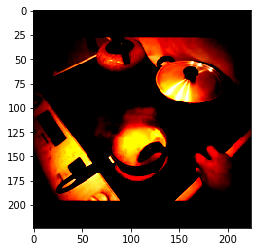

In [2]:
# video reader checker
frames = readShortVideo("HW5_data/TrimmedVideos/video/train/", 
                        "OP01-R01-PastaSalad", "OP01-R01-PastaSalad-1002316-1004005-F024051-F024101.mp4",
                        downsample_factor=12, rescale_factor=1)
a = frames[1].numpy().transpose(1,2,0)
print(a.shape)
plt.imshow(a)
plt.show()

after normalization the image would be weird, but here we only care about the shape

In [3]:
all_video_path = []
all_video_frame = []
video_path = "HW5_data/TrimmedVideos/video/train/"
category_list = sorted(listdir(video_path))
for category in category_list:
    print(category)
    video_list_per_folder = sorted(listdir(os.path.join(video_path,category)))
    a = ["-".join(file_name.split("-")[:5]) for file_name in video_list_per_folder]
    all_video_path += a
    for video in video_list_per_folder:
        frames = readShortVideo(video_path, category, video, downsample_factor=6, rescale_factor=1)
        all_video_frame.append(torch.stack(frames))

OP01-R01-PastaSalad
OP01-R04-ContinentalBreakfast
OP01-R05-Cheeseburger
OP01-R06-GreekSalad
OP01-R07-Pizza
OP02-R01-PastaSalad
OP02-R02-TurkeySandwich
OP02-R03-BaconAndEggs
OP02-R05-Cheeseburger
OP02-R06-GreekSalad
OP02-R07-Pizza
OP03-R01-PastaSalad
OP03-R03-BaconAndEggs
OP03-R04-ContinentalBreakfast
OP03-R05-Cheeseburger
OP03-R07-Pizza
OP04-R01-PastaSalad
OP04-R02-TurkeySandwich
OP04-R03-BaconAndEggs
OP04-R04-ContinentalBreakfast
OP04-R06-GreekSalad
OP04-R07-Pizza
OP05-R03-BaconAndEggs
OP05-R04-ContinentalBreakfast
OP06-R02-TurkeySandwich
OP06-R03-BaconAndEggs
OP06-R04-ContinentalBreakfast
OP06-R06-GreekSalad
OP06-R07-Pizza


In [ ]:
train_X = []
for i in range(len(all_video_frame)):
    train_X.append(all_video_frame[i])

In [ ]:
with open("train_X_d6.pkl", "wb") as f:
    pickle.dump(train_X, f)

### validation set

In [2]:
# normalize for pytorch model input

all_video_path = []
all_video_frame = []
video_path = "HW5_data/TrimmedVideos/video/valid/"
category_list = sorted(listdir(video_path))
for category in category_list:
    print(category)
    video_list_per_folder = sorted(listdir(os.path.join(video_path,category)))
    a = ["-".join(file_name.split("-")[:5]) for file_name in video_list_per_folder]
    all_video_path += a
    for video in video_list_per_folder:
        frames = readShortVideo(video_path, category, video, downsample_factor=6, rescale_factor=1)
        all_video_frame.append(torch.stack(frames))

OP01-R03-BaconAndEggs
OP02-R04-ContinentalBreakfast
OP03-R02-TurkeySandwich
OP05-R07-Pizza
OP06-R05-Cheeseburger


In [ ]:
valid_X = []
for i in range(len(all_video_frame)):
    valid_X.append(all_video_frame[i])

with open("valid_X_d6.pkl", "wb") as f:
    pickle.dump(valid_X, f)

# preparing labels

In [ ]:
train_df = pd.read_csv("HW5_data/TrimmedVideos/label/gt_train.csv")
train_df.head()

In [ ]:
train_df = train_df.sort_values(["Video_name"]).reset_index(drop=True)

In [ ]:
train_df.head()

In [ ]:
video_name = train_df["Video_name"].tolist()

In [ ]:
all_video_path == video_name

In [ ]:
action_labels = train_df["Action_labels"].tolist()

with open("train_y.pkl", "wb") as f:
    pickle.dump(action_labels, f)

### groundtruth of validation set

In [5]:
valid_df = pd.read_csv("HW5_data/TrimmedVideos/label/gt_valid.csv")
valid_df = valid_df.sort_values(["Video_name"]).reset_index(drop=True)
valid_df.head()

,Video_index,Video_name,Video_category,Start_times,End_times,Action_labels,Nouns
0,145,OP01-R03-BaconAndEggs-1008874-1012033,OP01-R03-BaconAndEggs,1008874,1012033,0,stove
1,146,OP01-R03-BaconAndEggs-1012532-1035951,OP01-R03-BaconAndEggs,1012532,1035951,7,bacon
2,19,OP01-R03-BaconAndEggs-101720-104410,OP01-R03-BaconAndEggs,101720,104410,6,fridge
3,147,OP01-R03-BaconAndEggs-1036226-1037681,OP01-R03-BaconAndEggs,1036226,1037681,5,cooking_utensil
4,20,OP01-R03-BaconAndEggs-107115-108015,OP01-R03-BaconAndEggs,107115,108015,2,egg_container


In [ ]:
action_labels = valid_df["Action_labels"].tolist()

with open("valid_y.pkl", "wb") as f:
    pickle.dump(action_labels, f)

In [22]:
valid_df = pd.read_csv("HW5_data/TrimmedVideos/label/gt_valid.csv")
valid_gt = valid_df["Video_name"].tolist()

In [23]:
valid_gt

['OP01-R03-BaconAndEggs-43440-45790',
 'OP01-R03-BaconAndEggs-47230-48130',
 'OP01-R03-BaconAndEggs-48205-49435',
 'OP01-R03-BaconAndEggs-51015-54435',
 'OP01-R03-BaconAndEggs-54960-56725',
 'OP01-R03-BaconAndEggs-56750-57900',
 'OP01-R03-BaconAndEggs-58910-62030',
 'OP01-R03-BaconAndEggs-69855-70965',
 'OP01-R03-BaconAndEggs-70975-72045',
 'OP01-R03-BaconAndEggs-73495-76610',
 'OP01-R03-BaconAndEggs-76775-78455',
 'OP01-R03-BaconAndEggs-78620-79750',
 'OP01-R03-BaconAndEggs-80520-81900',
 'OP01-R03-BaconAndEggs-84565-85695',
 'OP01-R03-BaconAndEggs-86755-87745',
 'OP01-R03-BaconAndEggs-95520-97760',
 'OP01-R03-BaconAndEggs-98630-99770',
 'OP01-R03-BaconAndEggs-99795-100635',
 'OP01-R03-BaconAndEggs-101720-104410',
 'OP01-R03-BaconAndEggs-107115-108015',
 'OP01-R03-BaconAndEggs-107510-109050',
 'OP01-R03-BaconAndEggs-109025-109775',
 'OP01-R03-BaconAndEggs-110060-114740',
 'OP01-R03-BaconAndEggs-118190-120140',
 'OP01-R03-BaconAndEggs-123170-127450',
 'OP01-R03-BaconAndEggs-128665-1298

In [26]:
reorder_index = []
for x in valid_gt:
    reorder_index.append(all_video_path.index(x))

In [ ]:
reorder_all_video_frame = all_video_frame

In [35]:
len(all_video_frame[3])

8